In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from tensorflow.keras.datasets import mnist

In [26]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(x_train),type(y_train))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [27]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [28]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [29]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

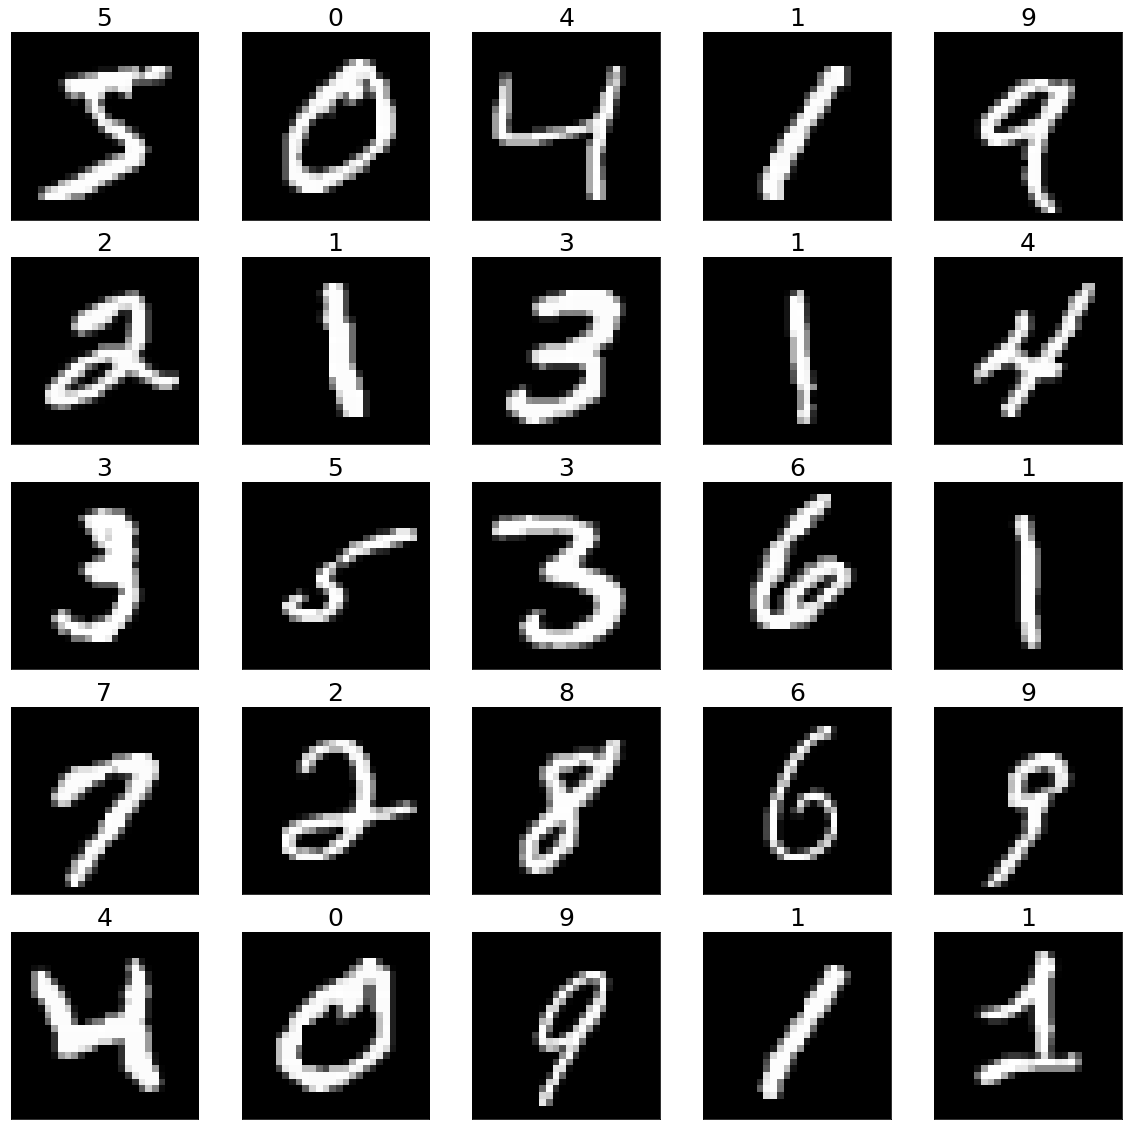

In [30]:
plt.figure(figsize=(20,20))
for i in range(25):  # i=0,1,2..,24
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontdict={'size':25})
plt.show()

In [31]:
x_train = x_train[:10000,:,:]
x_test = x_test[:3000,:,:]
y_train = y_train[:10000]
y_test = y_test[:3000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28)
(3000, 28, 28)
(10000,)
(3000,)


In [32]:
#### Normalize
x_train = x_train/255
x_test = x_test/255

#### Reshaping
x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(3000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(3000, 28, 28, 1)
(10000,)
(3000,)


#### Building the CNN Architecture

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [34]:
m1 = Sequential()
m1.add(Conv2D(64, (3,3), activation='relu',input_shape=(28,28,1))) # stride=1
m1.add(MaxPooling2D(pool_size=(2,2))) # stride = 2

m1.add(Conv2D(32, (3,3), activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))  # stride = 2

m1.add(Flatten())
m1.add(Dense(16,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [38]:
print(64*(1*(3*3))    +    64)
print(32*(64*(3*3))   +   32)

640
18464


In [39]:
m1.summary()
#              Weights         Bias
# conv2D    64*(1*(3*3))    +    64   =  640
# conv2D_1  32*(64*(3*3))   +   32   =  18464
# dense     16*800          +   16   =  12816
# dense     10*16           +   10   =  170

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12816     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [40]:
h1 = m1.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test))

Epoch 1/25
313/313 [==============================] - 19s 56ms/step - loss: 0.5467 - accuracy: 0.8359 - val_loss: 0.2206 - val_accuracy: 0.9343
Epoch 2/25
313/313 [==============================] - 18s 57ms/step - loss: 0.1592 - accuracy: 0.9538 - val_loss: 0.1880 - val_accuracy: 0.9427
Epoch 3/25
313/313 [==============================] - 17s 55ms/step - loss: 0.1141 - accuracy: 0.9662 - val_loss: 0.1480 - val_accuracy: 0.9527
Epoch 4/25
313/313 [==============================] - 16s 52ms/step - loss: 0.0942 - accuracy: 0.9723 - val_loss: 0.1384 - val_accuracy: 0.9533
Epoch 5/25
313/313 [==============================] - 15s 49ms/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 0.1194 - val_accuracy: 0.9587
Epoch 6/25
313/313 [==============================] - 16s 50ms/step - loss: 0.0614 - accuracy: 0.9820 - val_loss: 0.1203 - val_accuracy: 0.9630
Epoch 7/25
313/313 [==============================] - 16s 50ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.1190 - val_accuracy:

In [41]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
20,0.005187,0.9983,0.119827,0.970000,20
21,0.001378,0.9999,0.138949,0.970000,21
22,0.000472,1.0000,0.120017,0.973667,22
23,0.000186,1.0000,0.122127,0.973000,23
24,0.000138,1.0000,0.122149,0.973333,24


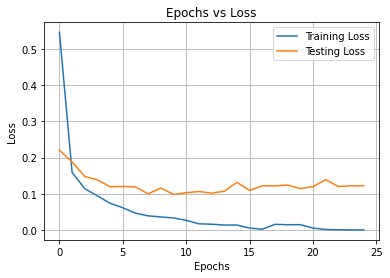

In [42]:
plt.plot(r1['Epochs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.grid()
plt.legend()
plt.show()

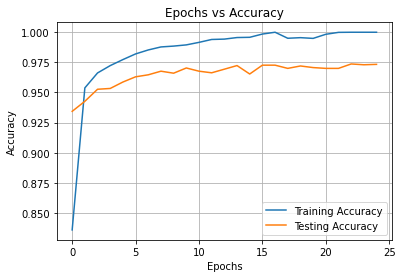

In [44]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.grid()
plt.legend()
plt.show()

In [45]:
print(x_test.shape)

(3000, 28, 28, 1)


In [46]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1[:5])

[[2.1140206e-24 2.5014367e-17 3.0930289e-14 1.0590605e-12 8.8692502e-23
  1.5316733e-23 0.0000000e+00 1.0000000e+00 1.1988709e-17 3.0219002e-20]
 [5.9233243e-12 6.7466387e-11 1.0000000e+00 4.1115423e-17 3.2716079e-19
  2.2446835e-20 8.3397227e-13 2.3552466e-19 9.1311865e-13 6.2552197e-22]
 [2.5025092e-14 9.9999988e-01 2.1068846e-08 1.5353262e-12 7.7368263e-08
  1.4656877e-14 3.1883715e-10 2.1784728e-10 9.0306040e-10 2.5998873e-13]
 [9.9999845e-01 6.4199139e-21 3.0682581e-10 7.7909233e-12 1.8688188e-13
  1.9791401e-13 2.5576330e-10 2.1229561e-12 7.6699508e-11 1.5316652e-06]
 [5.0272863e-21 3.0751122e-21 1.7499618e-21 6.1540940e-19 1.0000000e+00
  6.6081621e-30 1.8560941e-20 1.5583466e-17 5.1946172e-19 5.7123885e-12]]


In [48]:
print(ypred_m1.shape)

(3000, 10)


In [50]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

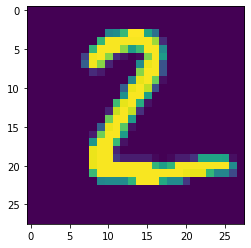

In [49]:
plt.imshow(x_test[1])
plt.show()

In [51]:
ypred = [np.argmax(i) for i in ypred_m1]
print(ypred[:5])

[7, 2, 1, 0, 4]


In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[266   0   2   0   1   0   1   0   1   0]
 [  0 337   1   2   0   0   0   0   0   0]
 [  0   2 307   1   0   0   0   1   2   0]
 [  0   0   0 310   0   3   0   1   2   0]
 [  0   0   1   0 311   0   2   0   1   3]
 [  0   0   0   8   1 268   1   2   2   1]
 [  2   2   0   0   1   1 263   0   3   0]
 [  0   2   2   2   2   0   0 297   0   1]
 [  3   0   2   3   0   0   0   2 275   1]
 [  1   2   1   0   3   2   0   0   0 286]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       271
           1       0.98      0.99      0.98       340
           2       0.97      0.98      0.98       313
           3       0.95      0.98      0.97       316
           4       0.97      0.98      0.98       318
           5       0.98      0.95      0.96       283
           6       0.99      0.97      0.98       272
           7       0.98      0.97      0.98       306
           8       0.96      0.96      0.96       286
           9       0.98     

In [58]:
print(x_test.shape)
print(x_test[85].shape)
print(x_test[[85]].shape)

(3000, 28, 28, 1)
(28, 28, 1)
(1, 28, 28, 1)


In [59]:
# plt.imshow(x_test[85])
test_pred = m1.predict(x_test[[85]])
test_pred

array([[4.9282912e-25, 4.1725455e-18, 3.8250445e-26, 1.8428033e-19,
        1.0000000e+00, 1.0530285e-22, 1.0635901e-21, 2.8056730e-14,
        3.7521088e-17, 2.3427322e-16]], dtype=float32)

Prediction Prob
 [[1.03690534e-13 1.94790896e-21 9.88530648e-16 1.70884967e-14
  4.31965894e-08 7.84150225e-20 1.55955146e-20 4.64470418e-09
  2.08951481e-13 1.00000000e+00]]
Pridicted Value 9


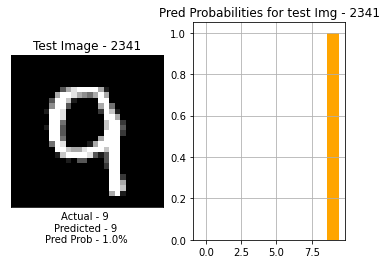

In [74]:
# hwd - hand written digit
def hwd_pred(img_idx):
    pred = m1.predict(x_test[[img_idx]])  # (1,28,28,1)
    res = np.argmax(pred)
    print('Prediction Prob\n',pred)
    print('Pridicted Value',res)
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx],'gray')
    plt.title(f'Test Image - {img_idx}')
    plt.xlabel(f'Actual - {y_test[img_idx]} \nPredicted - {res} \nPred Prob - {max(pred[0])}%')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.title(f'Pred Probabilities for test Img - {img_idx}')
    plt.xticks(list(range(10)))
    plt.grid()
    plt.show()
    
    
hwd_pred(2341)

Prediction Prob
 [[1.21729646e-15 5.24606256e-16 1.28311950e-15 7.74755802e-13
  1.37638312e-09 1.34159454e-20 4.46255136e-21 1.19430665e-09
  1.97934591e-14 1.00000000e+00]]
Pridicted Value 9


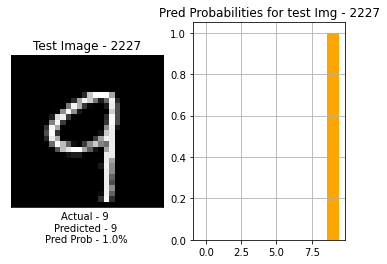

Prediction Prob
 [[1.2882919e-18 2.8089042e-16 2.1345595e-12 2.6555995e-09 1.1004788e-22
  1.4049519e-13 5.3047198e-25 1.8636073e-09 1.0000000e+00 1.1530464e-13]]
Pridicted Value 8


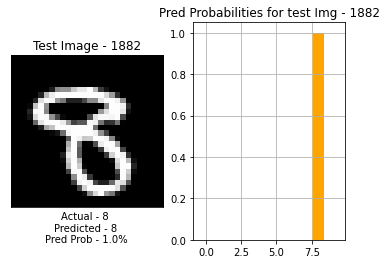

Prediction Prob
 [[2.5403635e-17 1.3478572e-21 1.3663500e-12 6.7151650e-13 2.9333725e-15
  1.6575062e-22 3.5140086e-27 3.9646921e-11 2.1525127e-15 1.0000000e+00]]
Pridicted Value 9


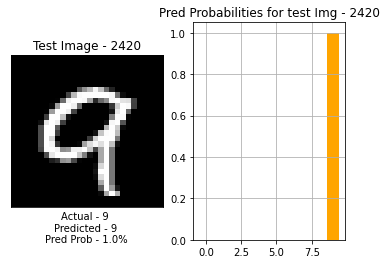

Prediction Prob
 [[8.7089581e-23 1.1112059e-30 1.1728477e-31 7.3538255e-14 8.2171340e-20
  1.0000000e+00 2.0419445e-13 5.6966846e-28 1.8317385e-17 3.6327261e-12]]
Pridicted Value 5


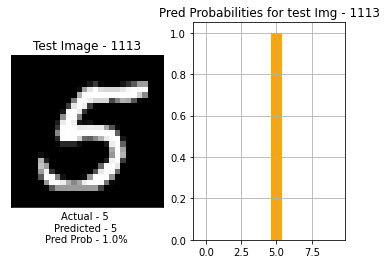

Prediction Prob
 [[1.0000000e+00 1.8285774e-23 7.0435856e-16 4.4970117e-17 2.5264998e-21
  1.6112145e-18 9.6514940e-15 1.2712820e-20 1.2956651e-14 2.2405402e-11]]
Pridicted Value 0


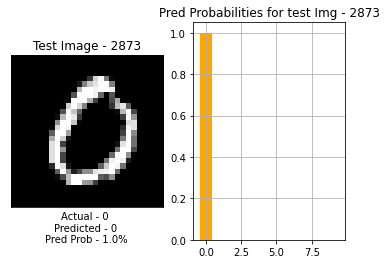

Prediction Prob
 [[9.4453398e-15 3.1745633e-12 1.2561186e-13 1.0000000e+00 4.4128286e-23
  1.5079958e-12 1.1129854e-34 2.1767630e-09 2.1351886e-14 7.8248430e-09]]
Pridicted Value 3


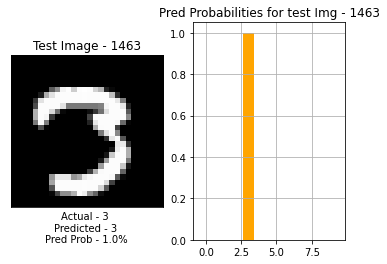

Prediction Prob
 [[1.7577800e-10 3.0717625e-12 2.9617203e-07 6.9445159e-06 1.7663120e-15
  1.8429866e-08 1.3542757e-19 3.8589806e-06 9.9998891e-01 3.0124401e-09]]
Pridicted Value 8


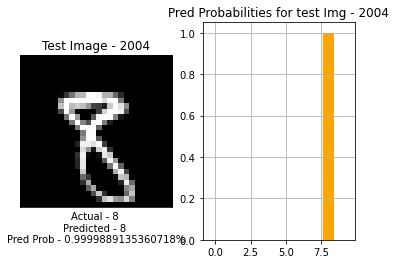

Prediction Prob
 [[1.6866914e-17 3.7235912e-17 4.4953746e-13 1.6613117e-13 4.9558636e-21
  8.3233735e-16 2.1524712e-23 1.2918102e-11 1.0000000e+00 2.0708026e-14]]
Pridicted Value 8


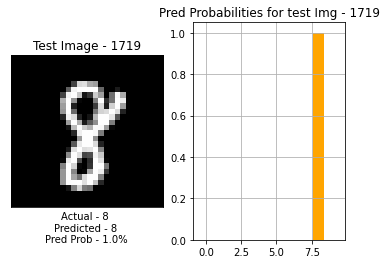

Prediction Prob
 [[8.0852578e-22 4.3221871e-09 1.0000000e+00 8.0971577e-18 3.0699636e-23
  2.2024448e-26 8.7382051e-24 6.5979042e-17 1.9553298e-15 2.5770540e-24]]
Pridicted Value 2


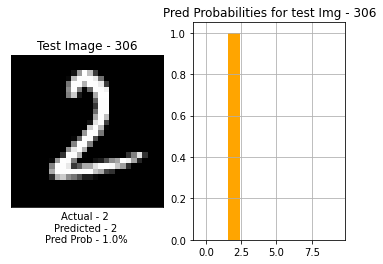

Prediction Prob
 [[1.2201730e-17 6.2152551e-16 1.1056314e-18 4.0237067e-09 3.5213270e-09
  1.1124152e-14 7.6808218e-23 2.6373494e-11 1.1261095e-11 1.0000000e+00]]
Pridicted Value 9


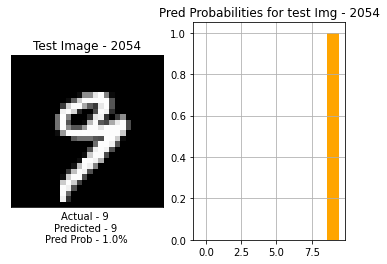

In [76]:
for i in np.random.randint(0,3000,10):
    hwd_pred(i)

In [78]:
m1.save('m1_digit_recog.h5')

In [79]:
import keras

#### Fashion_MNIST

In [80]:
from tensorflow.keras.datasets import fashion_mnist,cifar10

In [81]:
(x_trainf,y_trainf),(x_testf,y_testf) = fashion_mnist.load_data()
print(x_trainf.shape)
print(x_testf.shape)
print(y_trainf.shape)
print(y_testf.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


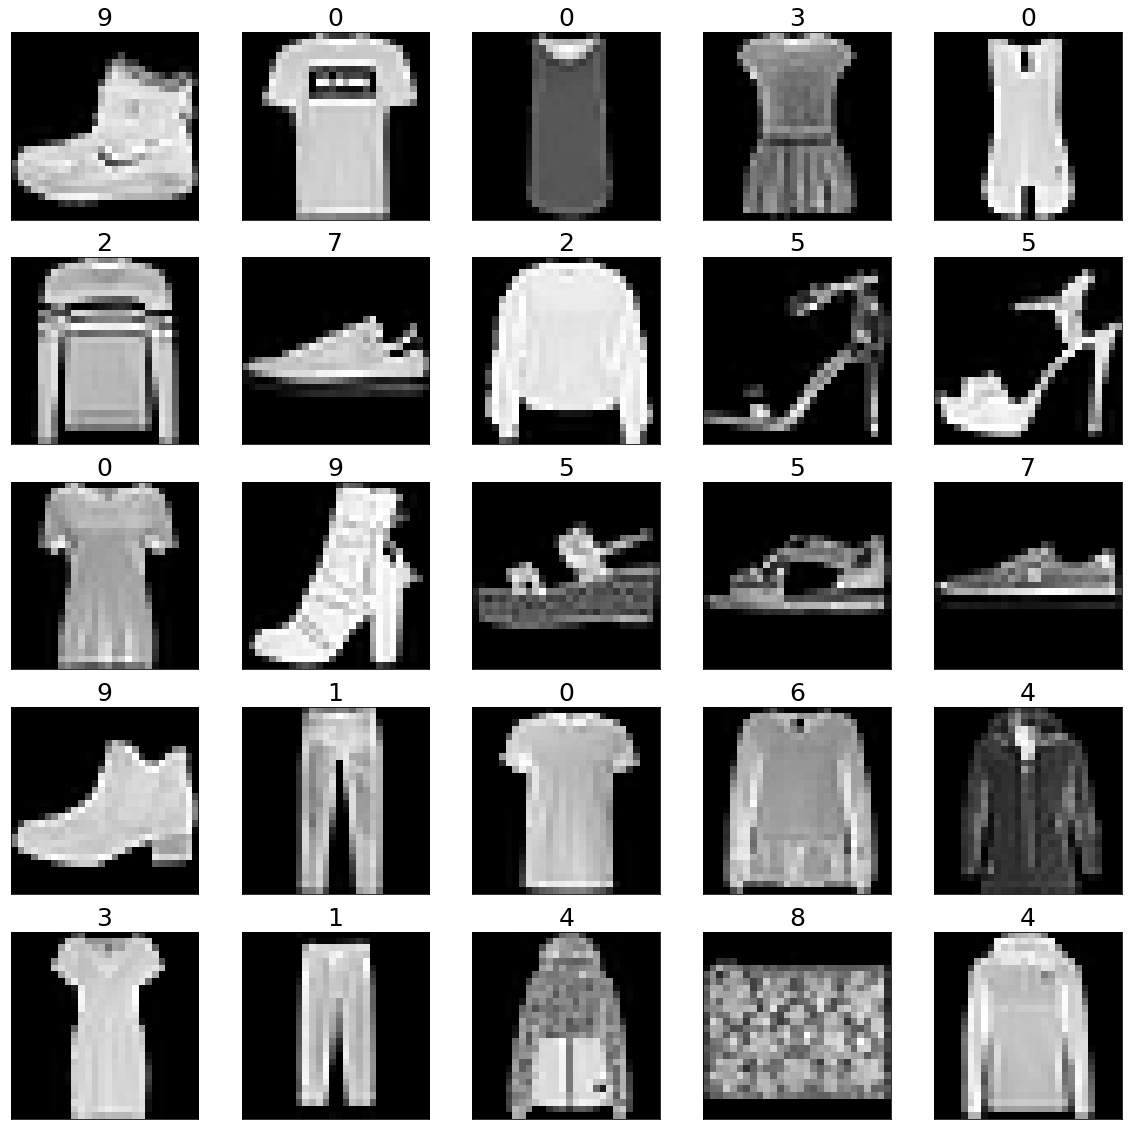

In [82]:
plt.figure(figsize=(20,20))
for i in range(25):  # i=0,1,2..,24
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_trainf[i],'gray')
    plt.title(y_trainf[i],fontdict={'size':25})
plt.show()

#### CIFAR10

In [83]:
(x_trainc,y_trainc),(x_testc,y_testc) = cifar10.load_data()
print(x_trainc.shape)
print(x_testc.shape)
print(y_trainc.shape)
print(y_testc.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


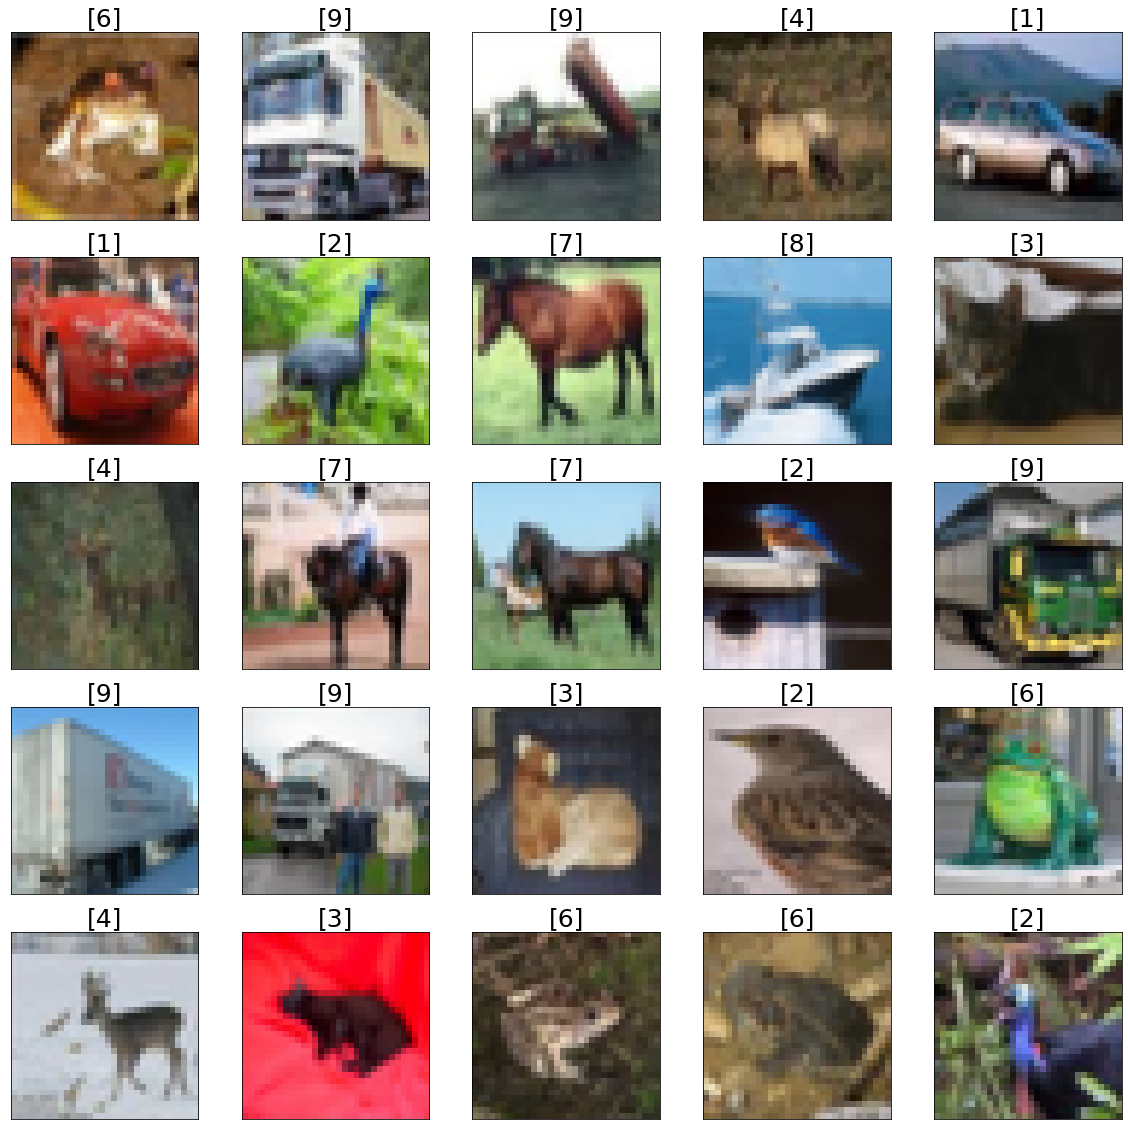

In [84]:
plt.figure(figsize=(20,20))
for i in range(25):  # i=0,1,2..,24
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_trainc[i],'gray')
    plt.title(y_trainc[i],fontdict={'size':25})
plt.show()